# Burseras and Friends
## How´s the environment ?
## Which are their friends ? 

In this example we will explore how to query and select a Node (Bursera, Node Type : Family) in the Tree Of Life.
We will extract the associated Cells and explore which kind of other taxa share that space. 
Let´s start!

![Burcera Environment](http://www.geographylists.com/mex_pv_forest.jpg "Bursera and its environment")


### Import modules libraries and load ploting style

In [2]:
%matplotlib inline
import sys
sys.path.append('/apps')
import django
django.setup()
from drivers.tree_builder import TreeNeo
from drivers.graph_models import TreeNode, Order, Family, graph

### Select the Node Bursera

Bursera is a Family of Plants. We want to select a Node in the Tree Of Life that is of the type Family and the name starts 
with "Burser". The expression "_.name=~STRING" means that we will look into the attribute "name" using a regular expression 
"=~" followed by any number of characters ".*"

In [3]:
bursera = list(Family.select(graph).where("_.name=~'Burser.*'")).pop()

The result is a list. Given that there is only one Node of the type Family that has the name "Burser" we can extract
the only element of the list using the standard method pop().

In [6]:
cells = list(bursera.cells)

In [7]:
c = cells[0]

In [8]:
c.occurrencesHere()

[<Occurrence pk=374085>,
 <Occurrence pk=374083>,
 <Occurrence pk=374038>,
 <Occurrence pk=374056>,
 <Occurrence pk=1526860>,
 <Occurrence pk=374087>,
 <Occurrence pk=374055>,
 <Occurrence pk=374025>,
 <Occurrence pk=374048>,
 <Occurrence pk=374041>,
 <Occurrence pk=374081>,
 <Occurrence pk=374045>,
 <Occurrence pk=374060>,
 <Occurrence pk=374043>,
 <Occurrence pk=374028>,
 <Occurrence pk=374058>,
 <Occurrence pk=374073>,
 <Occurrence pk=374053>,
 <Occurrence pk=374047>,
 <Occurrence pk=374034>,
 <Occurrence pk=374078>,
 <Occurrence pk=374036>,
 <Occurrence pk=374027>,
 <Occurrence pk=374051>,
 <Occurrence pk=374030>,
 <Occurrence pk=374074>,
 <Occurrence pk=374032>,
 <Occurrence pk=1552936>,
 <Occurrence pk=374089>,
 <Occurrence pk=1936541>,
 <Occurrence pk=935469>,
 <Occurrence pk=1553196>,
 <Occurrence pk=2043579>,
 <Occurrence pk=1556035>,
 <Occurrence pk=1910616>,
 <Occurrence pk=446314>,
 <Occurrence pk=537441>,
 <Occurrence pk=2178333>,
 <Occurrence pk=1954074>,
 <Occurrence pk=

In [9]:
tree = TreeNeo(c.occurrencesHere())

In [11]:
tree.associatedData.getEnvironmentalVariablesPoints()

[<LocalTree | Family: Asteraceae - n.count : 3- | AF: 0.05 >,
 <LocalTree | Family: Cactaceae - n.count : 4- | AF: 0.05 >,
 <LocalTree | Family: Nyctaginaceae - n.count : 1- | AF: 0.05 >,
 <LocalTree | Family: Rhamnaceae - n.count : 2- | AF: 0.05 >,
 <LocalTree | Family: Viperidae - n.count : 1- | AF: 0.05 >,
 <LocalTree | Family: Burseraceae - n.count : 2- | AF: 0.05 >,
 <LocalTree | Family: Euphorbiaceae - n.count : 2- | AF: 0.05 >,
 <LocalTree | Family: Heteroceridae - n.count : 27- | AF: 0.05 >,
 <LocalTree | Family: Accipitridae - n.count : 1- | AF: 0.05 >,
 <LocalTree | Family: Falconidae - n.count : 1- | AF: 0.05 >]

### Inspect taxonomy

In [1]:
bursera

NameError: name 'bursera' is not defined

In [31]:
bursera.getParent()

<TreeNode type: Order id = 933 name: Sapindales>

In [32]:
magno = bursera.getParent().getParent()

In [33]:
magno

<TreeNode type: Class id = 220 name: Magnoliopsida>

In [35]:
ll = list(magno.parent_link)

In [11]:
list(magno.parent_link)

[<TreeNode type: Phylum id = 49 name: Magnoliophyta>]

The Tree Node is an object and has defined methods (refer to the documentation). One of this methods extract the cells in the spatial lattice that has associated Bursera occurrences. 

In [36]:
cells_with_burseras = bursera.cells

The result is a generator object. This is helpfull when the number of cells is big and surpasses the capacity of the machine
or the analyst.

In [37]:
cells_with_burseras

<generator object __iter__ at 0x7f6546965fa0>

In this example we want to get only the first 10 cells.

In [38]:
cells_with_burseras = list(cells_with_burseras)

In [39]:
len(cells_with_burseras)

2537

## *Oke Oke*!, 
Now we want to get the subtrees of Life constrainted by the geographical attribute of this cells.
For doing this, simply get the occurrences within each cell with the method *occurrencesHere()* and use this output as the constructor argument.

In [13]:
c = cells_with_burseras[0]

In [14]:
c.occurrencesHere()

[<Occurrence pk=1266943>,
 <Occurrence pk=1266931>,
 <Occurrence pk=1266975>,
 <Occurrence pk=1266893>,
 <Occurrence pk=1266913>,
 <Occurrence pk=1266863>,
 <Occurrence pk=1266877>,
 <Occurrence pk=1343013>,
 <Occurrence pk=2090835>,
 <Occurrence pk=2096496>,
 <Occurrence pk=1266886>,
 <Occurrence pk=1239196>,
 <Occurrence pk=1266953>,
 <Occurrence pk=1266903>,
 <Occurrence pk=1239323>,
 <Occurrence pk=1239209>,
 <Occurrence pk=1239207>,
 <Occurrence pk=1239264>,
 <Occurrence pk=1343005>,
 <Occurrence pk=1266841>,
 <Occurrence pk=1314821>,
 <Occurrence pk=1266851>,
 <Occurrence pk=1342675>,
 <Occurrence pk=286138>,
 <Occurrence pk=1326412>,
 <Occurrence pk=1315197>,
 <Occurrence pk=1335226>,
 <Occurrence pk=1335240>,
 <Occurrence pk=283967>,
 <Occurrence pk=1328216>,
 <Occurrence pk=1307801>,
 <Occurrence pk=284084>,
 <Occurrence pk=284152>,
 <Occurrence pk=284098>,
 <Occurrence pk=283938>,
 <Occurrence pk=284179>,
 <Occurrence pk=284028>,
 <Occurrence pk=284117>,
 <Occurrence pk=28413

## Random subselection of cells
The number of cells is very big. An option for processing is to select a random uniform set of indexes. We can achieve this with the following strategy.

1. make a random sample selection


### Let's create a random subset of 100 cells.

In [40]:
import numpy.random as rnd

In [41]:
n = 100

In [42]:
indices = rnd.randint(0,len(cells_with_burseras),n)

In [43]:
selected_cells = [ cells_with_burseras[i] for i in indices ]

### Get the subtrees within the selected cells

Let's create first a Constructor function

In [47]:
selected_cells[:10]

[<Cell id=244213>,
 <Cell id=233529>,
 <Cell id=248416>,
 <Cell id=237397>,
 <Cell id=252667>,
 <Cell id=185515>,
 <Cell id=236366>,
 <Cell id=251521>,
 <Cell id=230845>,
 <Cell id=207217>]

In [48]:
c0 = selected_cells[:10][0]

In [52]:
ns = c0.getNeighbours()

In [53]:
ns

[<Cell id=244212>,
 <Cell id=244214>,
 <Cell id=244462>,
 <Cell id=243965>,
 <Cell id=244213>]

In [49]:
ToTree = lambda cell : TreeNeo(cell.occurrencesHere())

and map it to the selected cells

In [54]:
%time trees = map(ToTree,ns)

CPU times: user 840 ms, sys: 20 ms, total: 860 ms
Wall time: 1.14 s


#### Uff! it took 3 minutes, but it's a lot of data

In [55]:
trees

[<LocalTree Of Life | No record available: - n.count : 0- >,
 <LocalTree Of Life | Root: LUCA - n.count : 51- >,
 <LocalTree Of Life | No record available: - n.count : 0- >,
 <LocalTree Of Life | Root: LUCA - n.count : 6- >,
 <LocalTree Of Life | Root: LUCA - n.count : 28- >]

## Let´s make the big tree representing the window

In [56]:
bt = reduce(lambda a,b : a+b, trees)

INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees


In [75]:
bt.associatedData.getAssociatedRasterAreaData(string_selection="MeanTemperature")

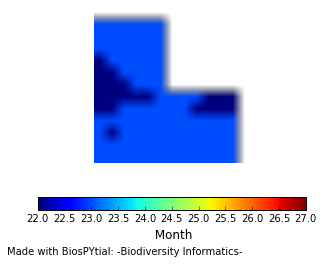

In [76]:
bt.associatedData.raster_MeanTemperature.display_field()

In [58]:
bt.countNodesFrequenciesOnList(trees)

INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 2
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 2
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 2
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 2
INFO Going deep 2
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 2
INFO Going deep 2
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 2
INFO Going deep 2
INFO Going deep 1
INFO Going

'N.A.'

In [64]:
sortl = lambda tree : tree.n_presences_in_list

In [65]:
bt.families.sort(key=sortl,reverse=True)

In [66]:
bt.families[:10]

[<LocalTree | Family: Bignoniaceae - n.count : 2- | AF: 2 >,
 <LocalTree | Family: Apocynaceae - n.count : 10- | AF: 2 >,
 <LocalTree | Family: Rubiaceae - n.count : 7- | AF: 2 >,
 <LocalTree | Family: Polygonaceae - n.count : 4- | AF: 2 >,
 <LocalTree | Family: Meliaceae - n.count : 3- | AF: 2 >,
 <LocalTree | Family: Sapindaceae - n.count : 6- | AF: 2 >,
 <LocalTree | Family: Malvaceae - n.count : 3- | AF: 2 >,
 <LocalTree | Family: Fabaceae - n.count : 19- | AF: 2 >,
 <LocalTree | Family: Putranjivaceae - n.count : 3- | AF: 2 >,
 <LocalTree | Family: Lauraceae - n.count : 2- | AF: 1 >]

In [70]:
graph

<Graph uri=u'http://biospytial_neo4j:7474/db/data/'>

In [67]:
bt.phyla

[<LocalTree | Phylum: Magnoliophyta - n.count : 85- | AF: 3 >]

In [73]:
bt.setGraph??

#### Get the UNION of the these 100 trees~

In [21]:
%time big_tree = reduce(lambda a,b : a + b , trees)

INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging

CPU times: user 1min 20s, sys: 492 ms, total: 1min 21s
Wall time: 1min 22s


In [22]:
big_tree.richness

22861

I told you, loads of data.
We can explore the content of this tree accessing to the attributes that start with the suffix ''to_''

In [23]:
mushrooms = big_tree.to_Fungi

Mushrooms is a TreeNode, i.e. not a complete TreeNeo object. To cast it (convert) to a TreeNode, and explore the families,classes, etc within it we must *plant-it* .

In [24]:
m = mushrooms.plantTreeNode()

In [25]:
type(mushrooms)

drivers.tree_builder.LocalTree

In [26]:
type(m)

drivers.tree_builder.TreeNeo

In [27]:
m.classes

[<TreeNode | Class: Agaricomycetes - n.count : 1- | AF: N.A. >,
 <TreeNode | Class: Pucciniomycetes - n.count : 3- | AF: N.A. >,
 <TreeNode | Class: Eurotiomycetes - n.count : 8- | AF: N.A. >,
 <TreeNode | Class: Lecanoromycetes - n.count : 91- | AF: N.A. >,
 <TreeNode | Class: Lichinomycetes - n.count : 6- | AF: N.A. >]

In [28]:
big_tree.to_Protozoa

<TreeNode | Kingdom: Protozoa - n.count : 17- | AF: N.A. >

In [29]:
big_tree.to_Plantae

<TreeNode | Kingdom: Plantae - n.count : 6441- | AF: N.A. >

In [30]:
big_tree.to_Animalia

<TreeNode | Kingdom: Animalia - n.count : 16291- | AF: N.A. >

### Cnidaria in the "terrestrial" environment ?  

In [32]:
cnidaria = big_tree.to_Animalia.to_Cnidaria

AttributeError: 'LocalTree' object has no attribute 'to_Cnidaria'

In [68]:
cnidaria

<TreeNode | Phylum: Cnidaria - n.count : 5- >

Where is this ?

In [69]:
cnidaria_cells = cnidaria.getExactCells()

In [70]:
cnidaria_cells

[<Cell id=223271>, <Cell id=199456>]

In [71]:
c1 , c2 = cnidaria_cells

In [72]:
c1.cell

u'MULTIPOLYGON (((-110.2690634159987 24.18688980100021, -110.2200634159987 24.18688980100021, -110.2200634159987 24.13788980100021, -110.2690634159987 24.13788980100021, -110.2690634159987 24.18688980100021)))'

![Cnidaria cell 1](cnidaria_cell1.png)

In [66]:
# c2.cell
## Dont do it, name to big.

![Cnidaria cell 2](cnidaria_cell2.png)

Close to the sea, but a little bit off the shore.

In [34]:
import redis

In [75]:
beatle = big_tree.to_Animalia.to_Arthropoda.to_Insecta.to_Coleoptera

## How many of these have beatles ?

In [35]:
with_beatles = filter(lambda tree : tree.hasNode(beatle),trees)

NameError: global name 'beatle' is not defined

In [36]:
len(with_beatles)

NameError: name 'with_beatles' is not defined

# Environmental Exploration
Remember that the big tree is defined in the geographical space given by the selected cells, i.e. the random sample.
We can get the environmental summary statistics of these cells with the following command.

In [37]:
%time bursera_env = big_tree.associatedData.getEnvironmentalVariablesCells(with_std=True)

CPU times: user 1min 42s, sys: 8.61 s, total: 1min 51s
Wall time: 3min 51s


In [38]:
bursera_env

{'MaxTemperature_mean': 14.121969454234756,
 'MaxTemperature_std': 4.006065262317484,
 'MeanTemperature_mean': 21.66893623838514,
 'MeanTemperature_std': 3.3072259058609785,
 'MinTemperature_mean': 29.20514258250562,
 'MinTemperature_std': 3.0664157452026277,
 'Precipitation_mean': 58.16749439282285,
 'Precipitation_std': 38.96332490543323,
 'SolarRadiation_mean': 18335.95265940404,
 'SolarRadiation_std': 1055.2620735583166,
 'Vapor_mean': 1.6413542667948304,
 'Vapor_std': 0.5536352334430281,
 'WindSpeed_mean': 2.3144558368044437,
 'WindSpeed_std': 0.5616478792620038}

### The same for point data

In [39]:
only_bursera = big_tree.to_Plantae.to_Magnoliophyta.to_Magnoliopsida.to_Sapindales.to_Burseraceae

In [40]:
pnts_env_burs = only_bursera.associatedData.getEnvironmentalVariablesPoints()

In [41]:
pnts_env_burs

MaxTemperature_mean  MaxTemperature_std  MeanTemperature_mean  \
0              14.500000            4.716991             23.250000   
1              14.500000            4.716991             23.250000   
2              18.500000            5.267827             25.166667   
3              13.666667            6.073622             22.916667   
4              13.666667            6.073622             22.916667   
5              11.583333            5.073761             19.166667   
6              15.166667            4.963758             22.750000   
7               9.583333            2.722080             18.000000   
8              15.333333            5.405758             21.000000   
9              15.333333            5.405758             21.000000   
10             12.583333            7.135105             21.916667   
11             12.583333            7.135105             21.916667   
12             15.166667            4.963758             22.750000   
13             14.000000            4.898979             22.833333   
14             14.000000            4.898979             22.833333   
15             12.916667            2.628635             20.666667   
16             11.750000            2.861381             19.666667   
17             11.750000            2.861381             19.666667   
18             11.750000            2.861381             19.666667   
19             11.833333            2.793842             19.833333   
20              7.833333            5.047001             17.000000   
21             14.500000            4.716991             23.250000   
22             14.500000            4.716991             23.250000   
23              9.250000            3.538479             17.416667   
24              9.583333            2.722080             18.000000   
25             10.000000            2.081666             15.666667   
26             11.750000            5.945937             21.750000   
27             11.750000            5.945937             21.750000   
28             10.666667            5.088113             18.250000   
29             11.166667            4.393809             21.000000   
..                   ...                 ...                   ...   
184            18.333333            3.064129             25.166667   
185            11.000000            5.845226             20.416667   
186            13.166667            4.687454             20.916667   
187            15.750000            4.284176             23.750000   
188            15.750000            4.284176             23.750000   
189            14.000000            4.898979             21.333333   
190            14.250000            4.303584             21.166667   
191            13.500000            5.155903             21.000000   
192            17.083333            5.765679             24.416667   
193            13.166667            4.669642             21.000000   
194            13.166667            4.669642             21.000000   
195            13.166667            4.669642             21.000000   
196            15.166667            4.963758             22.750000   
197            15.166667            4.963758             22.750000   
198            13.250000            4.798003             21.833333   
199            13.250000            4.798003             21.833333   
200            13.916667            4.172496             22.416667   
201            13.916667            4.172496             22.416667   
202            13.916667            4.172496             22.416667   
203            13.916667            4.172496             22.416667   
204            13.416667            4.517712             21.666667   
205            13.416667            4.517712             21.666667   
206            11.333333            5.104464             20.416667   
207            11.333333            5.104464             20.416667   
208            19.000000            3.082207             23.916667   
209            

## General aproach

In [72]:
r = redis.StrictRedis(host='redis', port=6379, db=0)

In [73]:
r.set('example2',pnts_env_burs.to_msgpack())

True

###  TO export into R
An option could be to use r2py but I've been experimeting with the Redis database. The idea is to store the dataframe as a CSV string and store it in a key : value .

In [79]:
r.set('example4',pnts_env_burs.to_csv())

True

In R it is very easy to read the data using the redisCMD package.
* string_dat = redisGet('example4')
con <- textConnection(string_dat)
data <- read.csv(con)

In [45]:
birds = t.to_Animalia.to_Chordata.to_Aves

In [46]:
bursera

<TreeNode type: Family id = 343770 name: Burseraceae>

In [47]:
birds

<TreeNode | Class: Aves - n.count : 8- >

In [48]:
trees

[<LocalTree Of Life | Root: LUCA - n.count : 14- >,
 <LocalTree Of Life | Root: LUCA - n.count : 4- >,
 <LocalTree Of Life | Root: LUCA - n.count : 37- >,
 <LocalTree Of Life | Root: LUCA - n.count : 373- >,
 <LocalTree Of Life | Root: LUCA - n.count : 5- >,
 <LocalTree Of Life | Root: LUCA - n.count : 9- >,
 <LocalTree Of Life | Root: LUCA - n.count : 2- >,
 <LocalTree Of Life | Root: LUCA - n.count : 59- >,
 <LocalTree Of Life | Root: LUCA - n.count : 947- >,
 <LocalTree Of Life | Root: LUCA - n.count : 1052- >]

In [49]:
filter(lambda tree : tree.hasNode(birds),trees)

[<LocalTree Of Life | Root: LUCA - n.count : 14- >,
 <LocalTree Of Life | Root: LUCA - n.count : 373- >,
 <LocalTree Of Life | Root: LUCA - n.count : 947- >,
 <LocalTree Of Life | Root: LUCA - n.count : 1052- >]

In [56]:
getNeighbourhood = lambda tree : tree.getNeighboringTrees()